<a href="https://colab.research.google.com/github/shpotes/clustering/blob/master/notebooks/experiments/TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Descomentar la primera vez que se inicia la seccion de colab
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

!git clone https://github.com/shpotes/clustering
%cd clustering

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 185 (delta 5), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (185/185), 57.14 KiB | 672.00 KiB/s, done.
Resolving deltas: 100% (67/67), done.
PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT CHANGES: RAPIDS on Colab will be pegged to 0.14 Stable until further notice.
2. Default stable version is now 0.14.  Nightly will redirect to 0.14.
3. You can now declare your RAPIDSAI version as a CLI option and skip the user prompts (ex: '0.14' or '0.15', between 0.13 to 0.14, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.14', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash ra

In [25]:
import pathlib 
import numpy as np
import matplotlib.pyplot as plt
from cuml.manifold import TSNE
from cuml.cluster import KMeans
from src import KMeansPlusPlus

In [26]:
tsne = TSNE(
    n_components = 2,
    learning_rate_method='none', 
    perplexity=50, 
    n_neighbors=32, 
    n_iter=1000,
    metric='cosine'
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: TSNE does not support cosine but only Euclidean. Will do in the near future.
  import sys


In [28]:
def get_study_name(name):
  if 'bert' in name:
    study_name = 'BERT '
    if 'large' in name:
      study_name += 'large'
    else:
      study_name += 'base'
  
  else:
    study_name = 'word2vec '
    if 'sm' in name:
      study_name += 'small'
    elif 'md' in name:
      study_name += 'medium'
    else:
      study_name += 'large'

  return study_name

In [30]:
!mkdir tsne

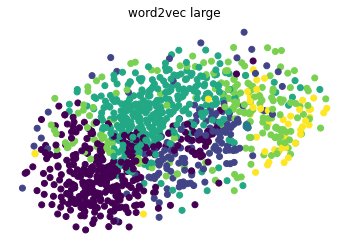

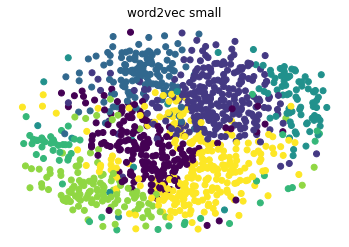

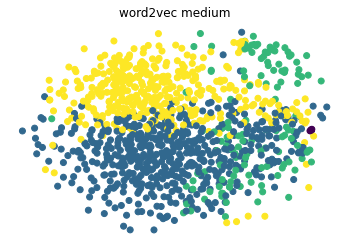

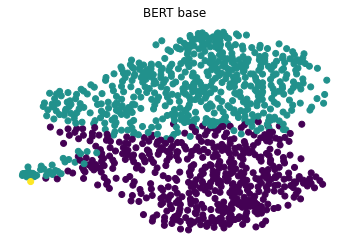

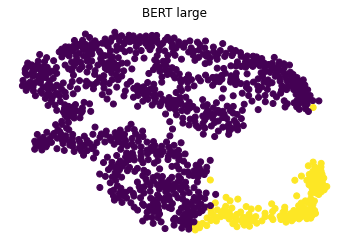

In [63]:
params = zip(pathlib.Path('repr').glob('**/*validation.npy'), (6, 7, 4, 3, 2))
for fname, k in params:
  model = np.load(fname)
  clustering = KMeansPlusPlus(k)
  labels = clustering.fit_predict(model)
  plt.scatter(*tsne.fit_transform(model).T, c=labels)
  title = get_study_name(fname.stem)
  plt.title(title)
  plt.axis('off')
  plt.savefig(f'tsne/{title.replace(" ", "-")}.png', dpi=224)
  plt.show()
  plt.close()

In [59]:
!ls tsne/

BERT-base.png	word2vec-large.png   word2vec-small.png
BERT-large.png	word2vec-medium.png


In [61]:
!zip -r tsne.zip tsne

  adding: tsne/ (stored 0%)
  adding: tsne/BERT-base.png (deflated 3%)
  adding: tsne/word2vec-small.png (deflated 2%)
  adding: tsne/word2vec-large.png (deflated 2%)
  adding: tsne/BERT-large.png (deflated 3%)
  adding: tsne/word2vec-medium.png (deflated 2%)
